In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from IPython.display import display
from IPython.html import widgets
plt.style.use('ggplot')

/home/ashray/anaconda3/envs/py37torch1/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
test_data_input = dict(np.load('datasets/livneh/testA.npz'))
test_data_output = dict(np.load('datasets/livneh/testB.npz'))

In [4]:
test_data_output.keys()

dict_keys(['data', 'variables', 'metadata'])

In [5]:
test_data_output['metadata']

array([], dtype=float64)

In [6]:
SWEData = test_data_output['data']
InpData = test_data_input['data']

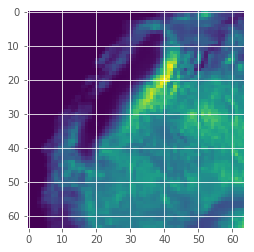

In [22]:
plt.imshow((InpData[400,:,:,:])[:,:,5])

In [8]:
test_data_input['variables']

array(['Prec', 'Tmax', 'Tmin', 'Wind', 'NetRad', 'Height'], dtype='<U6')

In [9]:
# for i in range(0, 804):
#     for j in range(0, 804):
#         print(np.all(np.isnan(InpData[i,:,:,:]) == np.isnan(InpData[j,:,:,:])))

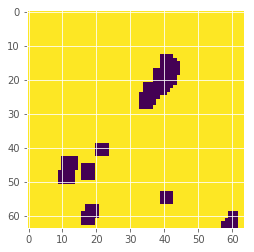

In [10]:
plt.imshow(np.nan_to_num(SWEData[1,:,:,:])[:,:,0] == 0)

In [11]:
np.save('OceanMask.npy', np.isnan(InpData[1,:,:,:])[:,:,2])

In [12]:
train_data_output = dict(np.load('datasets/livneh/trainB.npz'))
SWEData = train_data_output['data']


In [13]:
SWEData.shape

(3214, 321, 321, 1)

In [14]:
#Here we're creating a mask based on the frequency at which we have non-zero SWE data.
#So if we give it input of 100%, we will only be returned with points that always have data.

In [15]:
def percent_nonzeros_mask(data, percentages):
    data = np.nan_to_num(data)
    num_dat = np.sum(np.nan_to_num(data)!= 0, axis = 0)[:,:,0]
        
    return np.array([num_dat > i*data.shape[0] for i in percentages])




In [16]:
num_dat = percent_nonzeros_mask(SWEData, np.arange(0, 1, 0.0001))
def plt_percent_mask(index):
    plt.spy(num_dat[index, :, :])
    plt.show()

In [17]:
interact(plt_percent_mask, index = (0, 9900-1, 1))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT00OTQ5LCBkZXNjcmlwdGlvbj11J2luZGV4JywgbWF4PTk4OTkpLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSd3aWRnZXTigKY=


<function __main__.plt_percent_mask>

In [18]:
num_dat = percent_nonzeros_mask(SWEData, (1/np.arange(1, 100, 0.01))[::-1])
def plt_log_percent_mask(index):
    plt.spy(num_dat[index, :, :])
    plt.show()

In [19]:
interact(plt_log_percent_mask, index = (0, 9900-1, 1))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT00OTQ5LCBkZXNjcmlwdGlvbj11J2luZGV4JywgbWF4PTk4OTkpLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSd3aWRnZXTigKY=


<function __main__.plt_log_percent_mask>

In [18]:
#Other idea is to mask really weak data? Stuff that's consistently very near 0, even if it's consistently also nonzero.
def average_mask(data, value):
    data = np.nan_to_num(data)
    num_dat = np.mean(np.nan_to_num(data), axis = 0)[:,:,0]
        
    return (num_dat > value)

In [19]:
avg_dat = average_mask(SWEData, 0.05)

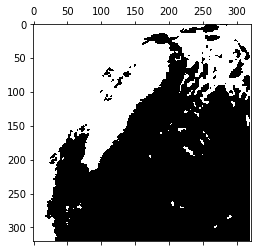

In [20]:
plt.spy(avg_dat)